In [ ]:
pip install tensorflow keras matplotlib numpy

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths to your dataset folders
train_dir = '/content/drive/MyDrive/Dataset/train'
test_dir = '/content/drive/MyDrive/Dataset/test'

# Image data generator for pre-processing and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   brightness_range=[0.8, 1.2],  # Change brightness
                                   horizontal_flip=True,
                                   fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Match input size of pre-trained models
    batch_size=32,
    class_mode='binary'  # Because it’s binary classification (Pneumonia vs Normal)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load MobileNetV2 pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model so we don't train it
base_model.trainable = False

# Add custom classification layers on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary classification (Pneumonia or Normal)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,  # Increase the number of epochs
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.5345 - loss: 0.7412 - val_accuracy: 0.6500 - val_loss: 0.6103
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6628 - loss: 0.6200 - val_accuracy: 0.8750 - val_loss: 0.4651
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7624 - loss: 0.5031 - val_accuracy: 0.9000 - val_loss: 0.3839
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8088 - loss: 0.4833 - val_accuracy: 0.9000 - val_loss: 0.3388
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8109 - loss: 0.4346 - val_accuracy: 0.9250 - val_loss: 0.3249
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8342 - loss: 0.4166 - val_accuracy: 0.9000 - val_loss: 0.2833
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8748 - loss: 0.3317 - val_accuracy: 0.9000 - val_loss: 0.2594
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9031 - loss: 0.3141 - val_accuracy: 0.9000 - val_loss: 0.2445
Epoch 9/30
5/5 ━━━━

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.9563 - loss: 0.1683
Test Accuracy: 95.00%


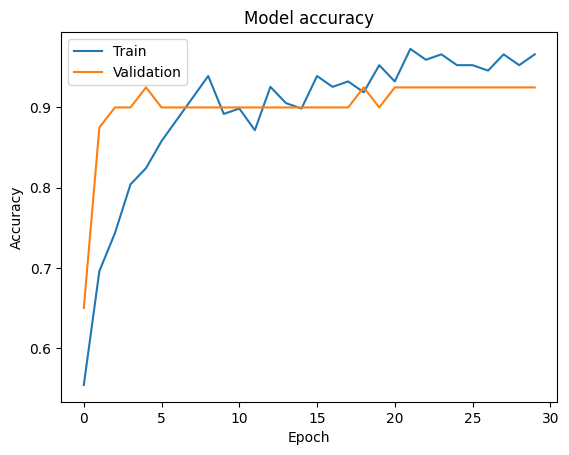

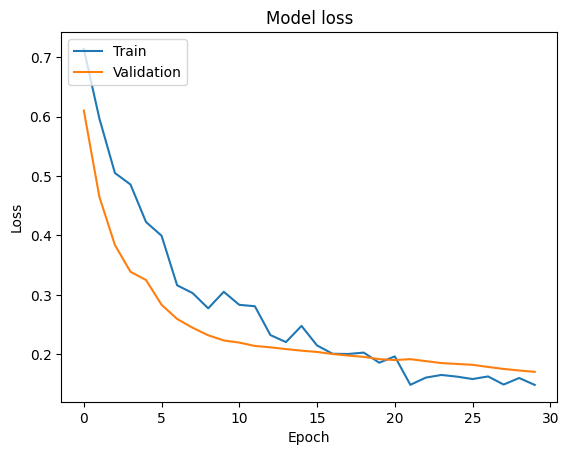

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:

# Unfreeze some layers of the base model
base_model.trainable = True

# Fine-tune starting from layer 100 (for example)
for layer in base_model.layers[:100]:
    layer.trainable = False

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(train_generator,
                         validation_data=test_generator,
                         epochs=20)  # Additional epochs for fine-tuning


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.8129 - loss: 0.3639 - val_accuracy: 0.9500 - val_loss: 0.1728
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9043 - loss: 0.2819 - val_accuracy: 0.9500 - val_loss: 0.1749
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8999 - loss: 0.2749 - val_accuracy: 0.9500 - val_loss: 0.1765
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9069 - loss: 0.1991 - val_accuracy: 0.9500 - val_loss: 0.1786
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.9679 - loss: 0.1529 - val_accuracy: 0.9250 - val_loss: 0.1855
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9474 - loss: 0.1598 - val_accuracy: 0.9250 - val_loss: 0.1915
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9426 - loss: 0.1886 - val_accuracy: 0.9250 - val_loss: 0.1919
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9655 - loss: 0.1483 - val_accuracy: 0.9250 - val_loss: 0.1919
Epoch 9/

In [ ]:
# prompt: save this trained model

model.save('/content/drive/MyDrive/pneumonia_classification_model.h5')


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions for the test set
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)  # Since it's a binary classification

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
              precision    recall  f1-score   support

      NORMAL       0.50      0.50      0.50        20
   PNEUMONIA       0.50      0.50      0.50        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40

[[10 10]
 [10 10]]
